In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import style
style.use('fivethirtyeight')

import plotly.graph_objects as go

from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot
init_notebook_mode(connected=True)

In [2]:
dataq = pd.read_csv('quake_db_1965-2016.csv')

In [3]:
country_code = 'ID'
country_df = dataq[dataq['Place'].str.contains(country_code)]

In [4]:
country_df = country_df[['Date', 'Latitude', 'Longitude', 'Magnitude', 'Depth', 'Place']]
_, _, country_df['Year'] = country_df['Date'].str.split('/').str
country_df.loc[:, 'Year'] = country_df.loc[:, 'Year'].astype(int)

In [5]:
country_df.head()

,Date,Latitude,Longitude,Magnitude,Depth,Place,Year
1,01/04/1965,1.863,127.352,5.8,80.0,"Ngidihopitonu, ID",1965
10,01/17/1965,-6.807,108.988,5.9,227.9,"Bulakamba, ID",1965
11,01/24/1965,-2.608,125.952,8.2,20.0,"Umaoya, ID",1965
54,02/15/1965,3.026,125.951,5.9,100.0,"Enunawira, ID",1965
93,03/19/1965,-1.887,119.836,6.0,40.0,"Babana, ID",1965


In [6]:
country_df.shape

(2241, 7)

In [7]:
years = list(set(country_df['Year'].to_list()))

In [8]:
center_lat = country_df[country_df['Magnitude'] >= country_df['Magnitude'].min()]['Latitude'].to_list()[0]
center_lon = country_df[country_df['Magnitude'] >= country_df['Magnitude'].min()]['Longitude'].to_list()[0]
print('Center Latitude : ', center_lat)
print('Center Longitude : ', center_lon)

Center Latitude :  1.8630000000000002
Center Longitude :  127.352


In [9]:
def grabContentPerYear(year):
    cn_year_df = country_df[country_df['Year'] == int(year)]
    return cn_year_df

In [10]:
frames = []
for year in years:
    cn_year_df = grabContentPerYear(year)
    lats = cn_year_df['Latitude'].to_list()
    lons = cn_year_df['Longitude'].to_list()
    frames.append(
        dict(data=[
            dict(
                type='scattermapbox',
                lat=lats,
                lon=lons,
                mode='markers',
                marker=dict(size=7, color='red')
            )
        ],
             traces=[0],
             name='frame{}'.format(year)
        )
    )

In [11]:
fig = go.Figure(
    data=[go.Scattermapbox(
        lat=[center_lat],
        lon=[center_lon],
        mode='markers',
        marker=dict(size=10, color='red')
    )],
    layout=go.Layout(
        width=800,
        height=400,
        autosize=True,
        hovermode='closest',
        mapbox_style='stamen-terrain',
        margin=dict(l=0, r=0, t=0, b=0),
        mapbox=dict(
            bearing=0,
            center=dict(
                lat=center_lat,
                lon=center_lon
            ),
            pitch=0,
            zoom=2.3,
        ),
        updatemenus=[
            dict(
                type="buttons",
                buttons=[dict(
                    label="Play",
                    method="animate",
                    args=[None]
                )]
            )
        ]
    ),
    frames=frames    
)

In [12]:
fig.show()

In [13]:
dataq = dataq[dataq['Place'] != 'Unknown']
dataq['CountryCode'] = dataq['Place'].apply(lambda x : x.split(', ')[len(x.split(', ')) - 1])

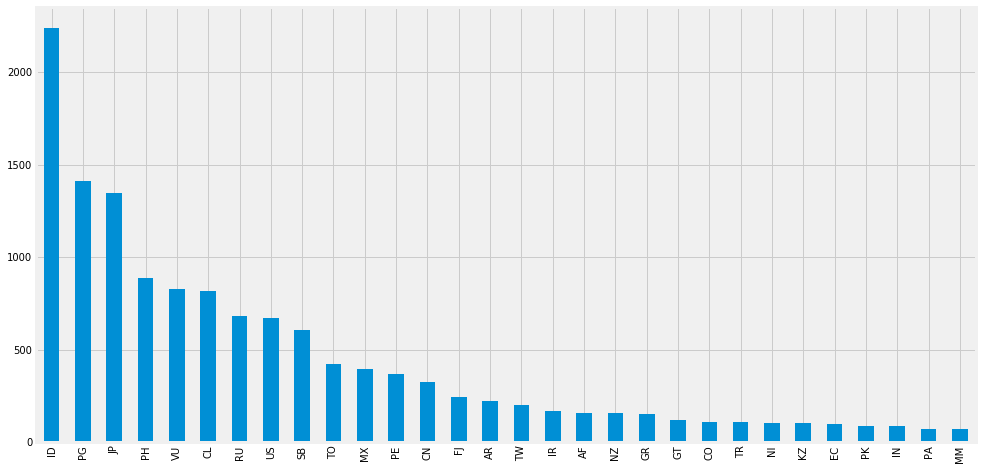

In [14]:
dataq['CountryCode'].value_counts().nlargest(30).plot(kind='bar', figsize=(15, 8))

In [15]:
top_thirty = dataq['CountryCode'].value_counts().nlargest(30).index
top_thirty

Index(['ID', 'PG', 'JP', 'PH', 'VU', 'CL', 'RU', 'US', 'SB', 'TO', 'MX', 'PE',
       'CN', 'FJ', 'AR', 'TW', 'IR', 'AF', 'NZ', 'GR', 'GT', 'CO', 'TR', 'NI',
       'KZ', 'EC', 'PK', 'IN', 'PA', 'MM'],
      dtype='object')

In [16]:
dataq_updated = dataq['CountryCode'].where(dataq['CountryCode'].isin(top_thirty), other='Other')
dataq_updated.value_counts()

ID       2241
PG       1410
JP       1347
Other    1211
PH        886
VU        830
CL        815
RU        682
US        671
SB        606
TO        423
MX        396
PE        370
CN        324
FJ        243
AR        221
TW        200
IR        166
AF        159
NZ        155
GR        152
GT        120
CO        109
TR        108
NI        105
KZ        102
EC        100
IN         86
PK         86
PA         72
MM         71
Name: CountryCode, dtype: int64

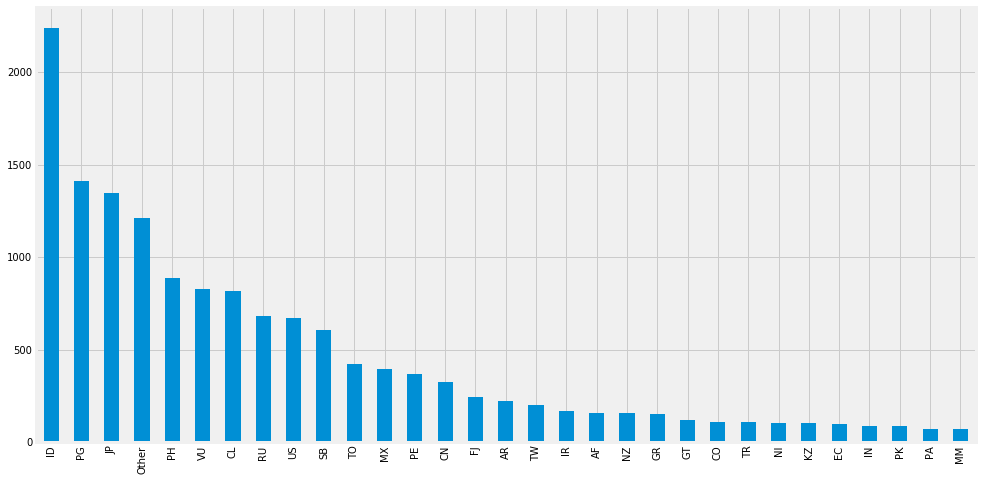

In [17]:
dataq_updated.value_counts().plot(kind='bar', figsize=(15, 8))